In [1]:
import numpy as np
import pandas as pd

import seaborn as sns

from tabulate import tabulate

import matplotlib.pyplot as plt

In [2]:
!pip install tabulate

In [3]:
sns.set(context='notebook',palette='Spectral',style='darkgrid',font_scale=1.5,color_codes=True)

### Load Plant Master

In [4]:
plant_master = pd.read_excel('Data/Plant Master.xlsx')

In [5]:
plant_master.shape

(438, 13)

In [6]:
plant_master.head()

,Plant,Name 1,Valuation Area,Customer no. - plant,Vendor number plant,Factory calendar,Name 2,House number and street,PO Box,Postal Code,City,Sales organization,State
0,BC07,NERKUNDRAM,BC07,PLBC07,PLBC07,IN,NaN,"No.117 Poonamallee High Road,",600107.0,600107,Chennai,MFCS,Tamil Nadu
1,BC30,SAS NAGAR - MOHALI,BC30,PLBC30,PLBC30,IN,NaN,"C-118, Phase 07,",160055.0,160055,Mohali,MFCS,Punjab
2,X001,X001 - AUTO PLANET WHEELS,X001,PLX001,NaN,IN,Thane,"Unit No.3, Kothari Compound,",400610.0,400610,Thane,MFCA,Maharashtra
3,X002,X002 - BHANDARI INDUSTRIES PVT,X002,PLX002,NaN,IN,Ghaziabad,"18/1, C Site 4, Sahibabad",201010.0,201010,Ghaziabad,MFCA,Uttar Pradesh
4,X003,X003 - Om Sri Satya Sai Automo,X003,PLX003,NaN,IN,Bengaluru,"#75, Sy.No. 83/2, Panathur Mai",560087.0,560087,Bengaluru,MFCB,Karnataka


In [7]:
zones = { 'Himachal Pradesh':'North','Punjab':'North','Uttarakhand':'North','Uttar Pradesh':'North','Haryana':'North',
         'Jammu and Kashmir':'North','Chandigarh':'North','Delhi':'North',
         'Bihar':'East','Orissa':'East','Jharkhand':'East','West Bengal':'East','Rajasthan':'West','Odisha':'East',
         'Gujarat':'West','Goa':'West','Maharashtra':'West',
         'Karnataka':'South','Kerala':'South','Tamil Nadu':'South','Andhra Pradesh':'South','Telangana':'South',
         'Puducherry':'South',
         'Madhya Pradesh':'Central','Chhattisgarh':'Central',
         'Assam':'North East','Sikkim':'North East','Nagaland':'North East','Meghalaya':'North East',
         'Manipur':'North East','Mizoram':'North East','Tripura':'North East','Arunachal Pradesh':'North East'
        }

In [8]:
plant_master['Zone'] = plant_master['State'].map(zones)

### Load Customer Master

In [9]:
customer_master = pd.read_excel('Data/Customer_Data.xlsx',dtype=str)

In [10]:
customer_master.shape

(555338, 9)

In [11]:
customer_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555338 entries, 0 to 555337
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Business Partner  555338 non-null  object
 1   Customer No.      555338 non-null  object
 2   Partner Type      555260 non-null  object
 3   Data Origin       555202 non-null  object
 4   Title             509031 non-null  object
 5   Marital Status    16037 non-null   object
 6   Occupation        14558 non-null   object
 7   Date of Birth     13444 non-null   object
 8   Death date        663 non-null     object
dtypes: object(9)
memory usage: 38.1+ MB


In [12]:
customer_master.head()

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date
0,31,1,0001,Z001,NaN,NaN,NaN,NaN,NaN
1,32,2,0001,Z005,NaN,NaN,NaN,NaN,NaN
2,34,4,0001,Z005,NaN,2,NaN,NaN,NaN
3,35,5,0001,Z005,NaN,NaN,NaN,NaN,NaN
4,42,7,0001,Z008,NaN,NaN,NaN,NaN,NaN


#### Create mapping data

In [13]:
partner_type = { '0001':'Retail','0002':'Corporate','0003':'Fleet','0004':'Employee',
                '9001':'Insurance Company','9002':'Surveyor','9003':'Contact Person',}
#partner_type

In [14]:
data_origin = {
                'Z002':'Camp - Outdoor','Z001':'Camp - Workshop','Z003':'Emailers','Z004':'Fleet','Z005':'Reference - Customer',
               'Z006':'Reference - Employee','Z007':'Reference - Used car dealer','Z008':'Just Dial/Other helpline',
               'Z009':'Snapdeal/Other websites','Z010':'Company website','Z011':'Float activity','Z012':'Petrol pump activity',
               'Z013':'Hoardings/Outdoor Advertisements','Z014':'Insurance Company','Z015':'Television AD',
               'Z016':'Newspaper AD','Z017':'Newspaper leaflet','Z018':'Outdoor Sales Activity','Z019':'Spotted the outlet',
               'Z020':'Mahindra Sister concern Employee','Z021':'Other outdoor activity','Z022':'Radio'
              }
#data_origin

In [15]:
data_origin_short = {'Z002':'Camp - Outdoor','Z001':'Camp - Workshop','Z003':'Emailers','Z004':'Fleet',
                     'Z005':'Ref - Customer','Z006':'Ref - Employee','Z007':'Used Car Dealer','Z008':'Just Dial/Other',
                     'Z009':'Snapdeal/Web','Z010':'Company website','Z011':'Float activity','Z012':'Petrol pump',
                     'Z013':'Hoardings/ADVT','Z014':'Insurance Co','Z015':'Television AD','Z016':'Newspaper AD',
                     'Z017':'Newsppr leaflet','Z018':'Sales Activity','Z019':'Spotted outlet','Z020':'M & M Employee',
                     'Z021':'Outdoor Activty','Z022':'Radio'}

#data_origin_short

In [16]:
titles = { '0001':'Ms.','0002':'Mr.','0003':'Company','0004':'Mr. and Mrs.'}
#titles

In [17]:
marital_status = { '1':'Single','2':'Married','3':'Widowed','4':'Divorced','5':'Separated'}
#marital_status

In [18]:
occupations = { '0001':'Director','0002':'Sr. Manager','0003':'Vice President','0004':'Assistant Vice President',
               '0005':'Senior Vice President','0006':'Col','0007':'Lt.','0008':'Lt. Gen','0009':'Doctor','0010':'Capt','0011':'Executive Director',
               '0012':'Executive Assistant','0013':'Secretary','0014':'Regional Manager','0015':'Manager','0016':'Junior Manager',
               '0017':'DGM','0018':'General Manager','0019':'Sr. General Manager','0020':'Proprietor','0021':'Partner',
               '0022':'Vice Chairman','0023':'CFO','0024':'CTO','0025':'Self','0026':'Managing Director','0027':'Executive','0028':'CEO',
               '0029':'Customer','0030':'VIP Customer','0031':'Others'
              }
#occupations

In [19]:
customer_master['Partner Type Desc'] = customer_master['Partner Type'].map(partner_type)
customer_master['Data Origin Short Desc'] = customer_master['Data Origin'].map(data_origin_short)
customer_master['Data Origin Desc'] = customer_master['Data Origin'].map(data_origin)
customer_master['Title Desc'] = customer_master['Title'].map(titles)
customer_master['Marital Status Desc'] = customer_master['Marital Status'].map(marital_status)
customer_master['Occupation Desc'] = customer_master['Occupation'].map(occupations)


In [20]:
customer_master.sample(10)

,Business Partner,Customer No.,Partner Type,Data Origin,Title,Marital Status,Occupation,Date of Birth,Death date,Partner Type Desc,Data Origin Short Desc,Data Origin Desc,Title Desc,Marital Status Desc,Occupation Desc
269450,290163,278593,0001,Z006,0001,NaN,NaN,NaN,NaN,Retail,Ref - Employee,Reference - Employee,Ms.,NaN,NaN
3488,4044,3688,0001,Z006,0002,NaN,NaN,NaN,NaN,Retail,Ref - Employee,Reference - Employee,Mr.,NaN,NaN
393917,418505,406689,0001,Z006,0002,NaN,NaN,NaN,NaN,Retail,Ref - Employee,Reference - Employee,Mr.,NaN,NaN
508755,537013,525014,0001,Z006,0002,NaN,NaN,NaN,NaN,Retail,Ref - Employee,Reference - Employee,Mr.,NaN,NaN
313894,335909,324264,0001,Z006,0002,NaN,NaN,NaN,NaN,Retail,Ref - Employee,Reference - Employee,Mr.,NaN,NaN
133314,145999,138169,0001,Z008,NaN,NaN,NaN,NaN,NaN,Retail,Just Dial/Other,Just Dial/Other helpline,NaN,NaN,NaN
311309,333266,321611,0001,Z006,0002,NaN,NaN,NaN,NaN,Retail,Ref - Employee,Reference - Employee,Mr.,NaN,NaN
285998,307259,295649,0001,Z005,0002,NaN,NaN,NaN,NaN,Retail,Ref - Customer,Reference - Customer,Mr.,NaN,NaN
484188,511691,499711,0001,Z005,0002,NaN,NaN,NaN,NaN,Retail,Ref - Customer,Reference - Customer,Mr.,NaN,NaN
472601,499729,487784,0001,Z005,0002,NaN,NaN,NaN,NaN,Retail,Ref - Customer,Reference - Customer,Mr.,NaN,NaN


### Load Job Details

In [21]:
job_details = pd.read_csv('Data/JTD.csv')

In [22]:
job_details.sample(10)

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
54732,54732,84182,50,MSZE_MENU1,MSZEPS0007,Paid Service-Minor,P001,1.0,MIN,799.99
4253502,4253502,174699,20,1BSZZPI531100I99,NaN,OIL FILTER,P002,1.0,EA,163.34
5122235,5122235,793806,100,1FS020906EN22,NaN,WATER PUMP,P002,1.0,EA,1699.30
314785,314785,125142,80,OSLCC_SRV120,NaN,Engine Flush,P010,1.0,MIN,669.96
1458249,1458249,322547,20,OSLBP0204,NaN,FENDER - METALLIC PAINTING,P010,1.0,MIN,2587.02
3762135,3762135,391737,10,MISC_SRV07,NaN,MISC_OTHER CHARGES,P011,1.0,MIN,652.20
829618,829618,712926,10,MSSW_MENU3,MSSWWH0013,Wheel Alignment,P001,1.0,MIN,2.00
482861,482861,148071,60,TATAMOTORS_SRV,TMICFS0004,REPLACE FUEL FILTER ASSY,P001,36.0,MIN,197.99
1008360,1008360,748159,30,1BM0313AC0280N,NaN,PRIMARY FILTER ELEMENT,P002,1.0,EA,388.70
3745177,3745177,388267,50,MAHINDRA_SRV,MMSPPS0006,MISC LABOR 0.25 HOURS,P001,15.0,MIN,299.99


In [23]:
job_details[job_details['DBM Order']==168303]

,Unnamed: 0,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
4242115,4242115,168303,10,1EMJ96316634,NaN,BEARING OUTER,P002,1.0,EA,641.86
4242116,4242116,168303,20,1EMJ96316635,NaN,BEARING INNER,P002,1.0,EA,641.86
4242117,4242117,168303,30,FFSOIL200901,NaN,URANIA SUPREMO CI 4 15W 40,P002,3.5,L,970.79
4242118,4242118,168303,40,1EMJ25183779,NaN,OIL FILTER,P002,1.0,EA,94.24
4242119,4242119,168303,50,GMSZ_MENU1,GMSZPS0007,Paid Service-Minor,P001,1.0,MIN,699.08
4242120,4242120,168303,60,GENERALMOTORS_SRV,GMSZWH0003,REPLACE RR WHEEL BEARING (ONE),P001,72.0,MIN,504.06
4242121,4242121,168303,70,OSLCC_SRV120,NaN,Engine Flush,P010,1.0,MIN,500.06


### Load Invoice Details

In [24]:
invoice_details = pd.read_csv('Data/Final_invoice.csv')

C:\Users\USER PC\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (9,10,14,15,21,41,51) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [25]:
invoice_details.sample()

,Unnamed: 0,Amt Rcvd From Custom,Amt Rcvd From Ins Co,Area / Locality,CGST(14%),CGST(2.5%),CGST(6%),CGST(9%),CITY,Cash /Cashless Type,...,Service Advisor Name,TDS amount,Technician Name,Total Amt Wtd Tax.,Total CGST,Total GST,Total IGST,Total SGST/UGST,Total Value,User ID
10178,10178,0.0,0.0,VALASARAVAKKAM,0.0,0.0,0.0,0.0,CHENNAI,NaN,...,NaN,0.0,arun kumar,355.49,0.0,0.0,0.0,0.0,355.49,BC07SA2


In [26]:
invoice_details['JobCard Date New'] = pd.to_datetime(invoice_details['JobCard Date'] , format='%Y-%m-%d')

In [27]:
invoice_details['Invoice Date New'] = pd.to_datetime(invoice_details['Invoice Date'] , format='%Y-%m-%d')

In [28]:
invoice_details['Duration In Days'] = (invoice_details['Invoice Date New'] - invoice_details['JobCard Date New']).dt.days

In [29]:
master = invoice_details.drop(columns=['Amt Rcvd From Custom','Amt Rcvd From Ins Co','Area / Locality','CGST(14%)','CGST(2.5%)',
                              'CGST(6%)','CGST(9%)','CITY','District','IGST(12%)','IGST(18%)','IGST(28%)','IGST(5%)',
                              'Outstanding Amt','Pin code','Plant Name1','SGST/UGST(14%)','SGST/UGST(2.5%)','SGST/UGST(6%)',
                              'SGST/UGST(9%)','Service Advisor Name','Total CGST','Total GST','Total IGST','Total SGST/UGST',
                              'User ID','Cash /Cashless Type','Claim No.','Expiry Date','Gate Pass Date','Gate Pass Time',
                              'Insurance Company','Policy no.'])

## Join plant details to invoice
master = pd.merge(left=master,
                   right=plant_master[['Plant','Name 1','Name 2','Postal Code','City','State','Zone','Sales organization']],
                   left_on='Plant',
                   right_on='Plant',
                   how='left')

## Join customer details to master
master = pd.merge(left=master,
                   right=customer_master[['Customer No.','Partner Type Desc','Data Origin Desc','Marital Status Desc',
                                       'Title Desc']],
                   left_on='Customer No.',
                   right_on='Customer No.',
                   how='left')

## Join job details to master
master = pd.merge(left=master,
                   right=job_details,
                   left_on='Job Card No',
                   right_on='DBM Order',
                   how='left')

In [30]:
master.shape

(3090115, 50)

In [31]:
master.sample(10)

,Unnamed: 0_x,Cust Type,Customer No.,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,...,Unnamed: 0_y,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
2703914,856322,Retail,E1154,2016-08-30,7184800416,15:31:27,436246,2016-08-18,12:09:41,98759,...,1991680.0,436246.0,580.0,1FM59064506,NaN,EVAPORATOR,P002,1.0,EA,3839.51
2445555,806959,Retail,185698,2016-05-27,7156602262,12:25:56,369563,2016-05-12,12:33:49,104941,...,1705372.0,369563.0,20.0,1MS080200BR05,NaN,FRONT BRAKE PADS,P002,1.0,EA,1659.20
1511497,660848,Retail,E4691,2012-07-05,7000005556,11:01:12,5488,2012-07-03,10:26:57,111730,...,4142391.0,5488.0,10.0,FFSGIGIFTWIPER2012,NaN,WIPER BLADE,P002,1.0,EA,0.50
2130142,749765,Retail,158024,2016-02-18,7170401099,17:10:18,320985,2016-02-18,10:22:06,14177,...,1450235.0,320985.0,10.0,MISC_SRV07,NaN,MISC_OTHER CHARGES,P011,1.0,MIN,49.75
1861044,707986,Retail,27011,2013-09-28,7000053491,18:33:24,53767,2013-09-28,13:07:02,8500,...,2521855.0,53767.0,20.0,OSLCC_SRV20,NaN,PAINTING CHARGES,P010,1.0,MIN,999.91
1872972,709522,Retail,E9412,2013-10-07,7000055067,10:22:40,55276,2013-10-06,10:47:29,100109,...,2532306.0,55276.0,30.0,1CSA1EK5019,NaN,AIR FILTER,P002,1.0,EA,135.38
2638923,844307,Retail,225197,2016-08-20,7034204639,17:27:15,438008,2016-08-20,13:32:28,27072,...,1947778.0,438008.0,20.0,1BSA4PI518500I99,NaN,OIL FILTER,P002,1.0,EA,172.37
1628693,676868,Retail,9651,2013-02-03,7000021867,13:07:55,21779,2013-02-03,10:09:25,39054,...,2286960.0,21779.0,10.0,1CM2630002751,NaN,FILTER ASSY-ENG OIL,P002,1.0,EA,75.12
937644,581660,Retail,38115,2014-03-20,7000098095,11:05:50,98185,2014-03-15,19:50:18,88234,...,140299.0,98185.0,10.0,OSLCC_SRV32,NaN,REPAIRING CHARGES,P010,1.0,MIN,4499.80
1821824,702633,Retail,10505,2013-08-29,7000048053,12:47:01,47838,2013-08-27,11:30:01,59026,...,2479677.0,47838.0,160.0,FFSBULB012,NaN,"BULB 1016(12V,21/5W)",P002,1.0,EA,17.47


In [32]:
master[master['DBM Order']==168303]

,Unnamed: 0_x,Cust Type,Customer No.,Invoice Date,Invoice No,Invoice Time,Job Card No,JobCard Date,JobCard Time,KMs Reading,...,Unnamed: 0_y,DBM Order,Order Item,Material,Labor Value Number,Description,Item Category,Order Quantity,Target quantity UoM,Net value
0,0,Retail,67849,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,...,4242115.0,168303.0,10.0,1EMJ96316634,NaN,BEARING OUTER,P002,1.0,EA,641.86
1,0,Retail,67849,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,...,4242116.0,168303.0,20.0,1EMJ96316635,NaN,BEARING INNER,P002,1.0,EA,641.86
2,0,Retail,67849,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,...,4242117.0,168303.0,30.0,FFSOIL200901,NaN,URANIA SUPREMO CI 4 15W 40,P002,3.5,L,970.79
3,0,Retail,67849,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,...,4242118.0,168303.0,40.0,1EMJ25183779,NaN,OIL FILTER,P002,1.0,EA,94.24
4,0,Retail,67849,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,...,4242119.0,168303.0,50.0,GMSZ_MENU1,GMSZPS0007,Paid Service-Minor,P001,1.0,MIN,699.08
5,0,Retail,67849,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,...,4242120.0,168303.0,60.0,GENERALMOTORS_SRV,GMSZWH0003,REPLACE RR WHEEL BEARING (ONE),P001,72.0,MIN,504.06
6,0,Retail,67849,2015-01-02,7005200002,11:30:36,168303,2014-12-13,14:29:43,49317,...,4242121.0,168303.0,70.0,OSLCC_SRV120,NaN,Engine Flush,P010,1.0,MIN,500.06


In [33]:
master['Make-Model'] = master['Make'] + '-' + master['Model']

In [34]:
# importing the module 
import json 
  
# reading the data from the file 
with open('Data/city_tier.txt') as f: 
    data = f.read() 
    
# reconstructing the data as a dictionary 
city_tiers = json.loads(data) 
  
print("Data type after reconstruction : ", type(city_tiers)) 
print(city_tiers) 

Data type after reconstruction :  <class 'dict'>
{'Bangalore': 1, 'Chennai': 1, 'Delhi': 1, 'Bengaluru': 1, 'Hyderabad': 1, 'Kolkata': 1, 'Mumbai': 1, 'Ahmedabad': 1, 'Pune': 1, 'Agra': 2, 'Ajmer': 2, 'Aligarh': 2, 'Amravati': 2, 'Amritsar': 2, 'Asansol': 2, 'Aurangabad': 2, 'Bareilly': 2, 'Belgaum': 2, 'Bhavnagar': 2, 'Bhiwandi': 2, 'Bhopal': 2, 'Bhubaneswar': 2, 'Bikaner': 2, 'Bokaro Steel City': 2, 'Chandigarh': 2, 'Nagpur': 2, 'Cuttack': 2, 'Dehradun': 2, 'Dhanbad': 2, 'Bhilai': 2, 'Durgapur': 2, 'Erode': 2, 'Faridabad': 2, 'Firozabad': 2, 'Ghaziabad': 2, 'Gorakhpur': 2, 'Gulbarga': 2, 'Guntur': 2, 'Gwalior': 2, 'Gurgaon': 2, 'Guwahati': 2, 'Hubliâ€“Dharwad': 2, 'Indore': 2, 'Jabalpur': 2, 'Jaipur': 2, 'Jalandhar': 2, 'Jammu': 2, 'Jamnagar': 2, 'Jamshedpur': 2, 'Jhansi': 2, 'Jodhpur': 2, 'Kakinada': 2, 'Kannur': 2, 'Kanpur': 2, 'Kochi': 2, 'Kottayam': 2, 'Kolhapur': 2, 'Kollam': 2, 'Kota': 2, 'Kozhikode': 2, 'Kurnool': 2, 'Ludhiana': 2, 'Lucknow': 2, 'Madurai': 2, 'Malappuram': 2, 

In [35]:
master['City Tier'] = master['City'].map(city_tiers)

In [36]:
master[master['City Tier'].isna()]['City'].unique()

array([nan, 'Mohali', 'Thane', 'Ranipet', 'Villupuram', 'Chidambaram',
       'Neyveli', 'Ambur', 'Coimbatore', 'Thanjavur', 'Moga', 'Zirakpur',
       'Boripardhi', 'Shirur', 'Ahmednagar', 'Tuticorin', 'Chhindwara',
       'Tirupur', 'Pollachi', 'Dharmapuri', 'Rohtak', 'Ongole',
       'Rishikesh', 'Abohar', 'Shimoga', 'Chengalpattu', 'Una', 'Sonepat',
       'Thirupathi', 'Shrigonda', 'Nagercoil', 'Hassan', 'Khammam',
       'Hisar', 'Anantapur', 'Chomu', 'Dindigul', 'Palani', 'Kolar',
       'Indapur', 'Neemuch', 'Thiruvarur', 'Jhajjar', 'Dewas', 'Rudrapur',
       'Vijayapura', 'Hospet', 'Ratlam', 'Sikar', 'Bhagalpur', 'Udaipur',
       'Thiruvallur', 'Begusarai', 'Buldhana', 'Kullu', 'Jhunjhunu',
       'Rajsamand', 'Kalaburagi', 'Kottakkal', 'Nagda', 'Wardha',
       'Pinjore', 'Hubballi', 'Mohania', 'Wai', 'Mehsana', 'Vadali Bhoi',
       'Bhagpat', 'Satna', 'Kotputli', 'Rosera', 'Ramnagar', 'Namakkal',
       'Karur', 'Patiala', 'Nizamabad', 'Farrukhbad', 'Shamli',
       'Para

In [37]:
master['City Tier'] = master['City Tier'].fillna(3)

In [38]:
master['City Tier'] = master['City Tier'].astype(int)

In [39]:
master['City Tier'].value_counts()

3    2483011
2     358817
1     248287
Name: City Tier, dtype: int64

In [40]:
from datetime import date
PRESENT = date.today()
PRESENT = pd.to_datetime(PRESENT , format='%Y-%m-%d')

customer_cluster= master.groupby(['Customer No.','Data Origin Desc','City','City Tier']).agg(
    {'JobCard Date New': lambda date: (PRESENT - date.max()).days,
     'Invoice No': lambda num: len(num),
     'Total Amt Wtd Tax.': lambda price: price.sum(),
     'Make-Model': lambda model: len(set(model))})

# Change the name of columns
customer_cluster.columns=['monetary','frequency','recency','cars']

customer_cluster['recency'] = customer_cluster['recency'].astype(int)

customer_cluster['r_quartile'] = pd.qcut(customer_cluster['recency'], 4, ['1','2','3','4'])
customer_cluster['f_quartile'] = pd.qcut(customer_cluster['frequency'], 4, ['4','3','2','1'])
customer_cluster['m_quartile'] = pd.qcut(customer_cluster['monetary'], 4, ['4','3','2','1'])

customer_cluster['RFM_Score'] = customer_cluster.r_quartile.astype(str)+ customer_cluster.f_quartile.astype(str) + customer_cluster.m_quartile.astype(str)

In [41]:
customer_cluster = customer_cluster.reset_index()

In [42]:
customer_cluster.sample(20).index
#100001

Int64Index([  1688, 122016, 138762,  34202, 118825,   2213, 117782,  99939,
            105833,  78685, 126197, 123558,  31167,  88769, 139393,  44417,
            118067, 133348,  33732, 139866],
           dtype='int64')

In [43]:
# Filter out Top/Best cusotmers
customer_cluster[customer_cluster['RFM_Score']=='111'].sort_values('monetary', ascending=False)

,Customer No.,Data Origin Desc,City,City Tier,monetary,frequency,recency,cars,r_quartile,f_quartile,m_quartile,RFM_Score
28042,141000,Outdoor Sales Activity,Indore,2,1892,12,0,1,1,1,1,111
28401,141453,Outdoor Sales Activity,Indore,2,1890,12,0,1,1,1,1,111
28427,141492,Outdoor Sales Activity,Indore,2,1890,12,0,1,1,1,1,111
29190,142482,Outdoor Sales Activity,Indore,2,1886,12,0,1,1,1,1,111
29389,142724,Outdoor Sales Activity,Indore,2,1885,12,0,1,1,1,1,111
29597,142992,Other outdoor activity,Indore,2,1884,12,0,1,1,1,1,111
29673,143081,Other outdoor activity,Indore,2,1884,12,0,1,1,1,1,111
30174,143696,Outdoor Sales Activity,Indore,2,1882,12,0,1,1,1,1,111
29620,143020,Other outdoor activity,Indore,2,1876,12,0,1,1,1,1,111
34965,149734,Fleet,Bhopal,2,1857,21,468,1,1,1,1,111


In [44]:
from sklearn.preprocessing import LabelEncoder 

encode_list = ['Data Origin Desc']
le = LabelEncoder() 

#encode_list
for feature in encode_list:
    customer_cluster[feature]= le.fit_transform(customer_cluster[feature]) 

In [45]:
customer_cluster.head()

,Customer No.,Data Origin Desc,City,City Tier,monetary,frequency,recency,cars,r_quartile,f_quartile,m_quartile,RFM_Score
0,100001,16,Pune,1,1925,14,15912,3,3,1,1,311
1,100003,16,Shirur,3,2127,1,0,1,1,4,1,141
2,100004,16,Boripardhi,3,2127,1,249,1,1,4,1,141
3,100006,17,Abohar,3,2127,1,1223,1,2,4,1,241
4,100007,16,Tirupur,3,1656,26,463711,1,4,1,3,413


In [46]:
customer_cluster = customer_cluster[['Data Origin Desc','City Tier','cars','r_quartile','f_quartile','m_quartile','RFM_Score']]

In [47]:
customer_cluster.head()

,Data Origin Desc,City Tier,cars,r_quartile,f_quartile,m_quartile,RFM_Score
0,16,1,3,3,1,1,311
1,16,3,1,1,4,1,141
2,16,3,1,1,4,1,141
3,17,3,1,2,4,1,241
4,16,3,1,4,1,3,413


In [48]:

customer_cluster['Data Origin Desc'] = customer_cluster['Data Origin Desc'].astype('int8')
customer_cluster['City Tier'] = customer_cluster['City Tier'].astype('int8')
customer_cluster['cars'] = customer_cluster['cars'].astype('int8')
customer_cluster['r_quartile'] = customer_cluster['r_quartile'].astype('int8')
customer_cluster['f_quartile'] = customer_cluster['f_quartile'].astype('int8')
customer_cluster['m_quartile'] = customer_cluster['m_quartile'].astype('int8')

In [49]:
customer_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154938 entries, 0 to 154937
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Data Origin Desc  154938 non-null  int8  
 1   City Tier         154938 non-null  int8  
 2   cars              154938 non-null  int8  
 3   r_quartile        154938 non-null  int8  
 4   f_quartile        154938 non-null  int8  
 5   m_quartile        154938 non-null  int8  
 6   RFM_Score         154938 non-null  object
dtypes: int8(6), object(1)
memory usage: 2.1+ MB


In [50]:
# import packages
from sklearn.cluster import KMeans
# Code starts here

# Empty list for storing WCSS across all values of k
dist = []

# Iterate from 1-9
for i in range(1,6):
    # Initialize KMeans algorithm
    km=KMeans(n_clusters=i,init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit on data
    km.fit(customer_cluster)
    # Append WCSS to list storing WCSS
    dist.append(km.inertia_)


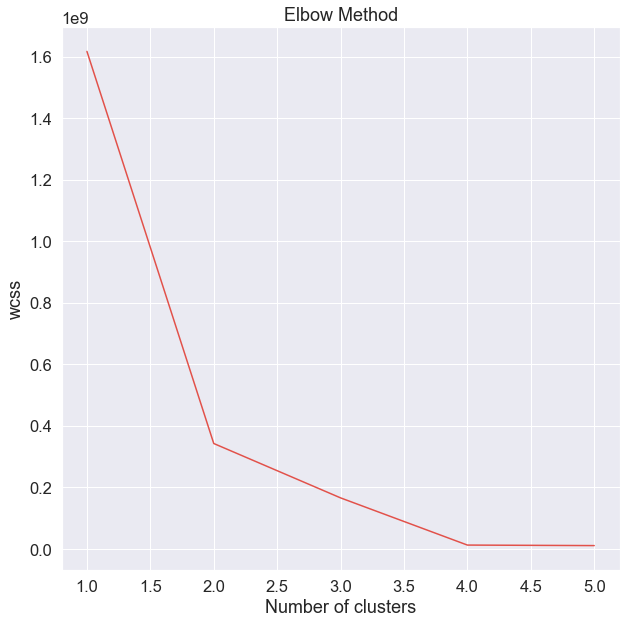

In [51]:
# Initialize figure
plt.figure(figsize=(10,10))

# Line plot # clusters on X-axis and WCSS on Y-axis 
plt.plot(range(1,6),dist)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

# Code ends here